In this programming exercise, we will implement a simple machine-learning algorithm to classify handwritten digits.

We start by writing a simple function to load the popular MNIST handwritten digit images and visualize some examples.

In order to create an engineerized software, I want to create two classes:


*   DatasetManager : utils for load the entire dataset, split properly to obtain a training set and a test set
*   NmcClassifier : responsable to compute a "fit" from the dataset and the "prediction" of the new samples



In [19]:
# Nearest Mean Centroid Exercise in Isde Course

import pandas as pd
import numpy as np

class DatasetManager:
  #constructor
  def __init__(self, filepath=''):
    self._pathDataset = filepath
    self._data = None

  #loadDatast with pandas
  def loadDataset(self, nSamples = None):
    if self._pathDataset != "" :

      self._data = pd.read_csv(self._pathDataset)
      self._data = np.array(self._data)

      if nSamples is not None:
        self._data = self._data[0:nSamples, : ]  #_data is 2D array.  0:nSamples select the first nSamples rows; only the column operator select all the columns of the dataseta

      self._x = self._data[ : , 1: ] #cut on from the first column to the end. x contains images
      self._y = self._data[ : , 0] #cut on the first column. y contains contains the label of the images

      return self._x,self._y

  #utils
  def digitsForEachClass(self):
    if self._data is not None:
      numClasses = np.unique(self._y).size #find unique element in an array
      print('NumClasses are: ',numClasses)
      counts = np.zeros(shape=(numClasses,), dtype=int)

      for i in range(0,numClasses):
        counts[i] = np.array(i == self._y).sum() # numpy broadcasting -> different vectors size

  def dataSplit(self,trainFraction = 0.6):
    numSamples = self._y.size
    trainingSamples = int(numSamples * trainFraction)
    idx = np.array(range(0, numSamples))
    #Shuffling process: is essential to ensure that the original order of the data does not influence the model training process
    np.random.shuffle(idx) # shuffle indexes

    #prepare indexes for training and test set
    indexesTraining = idx[0:trainingSamples]
    indexesTest = idx[trainingSamples:]

    #Training set: extract from dataset the shuffled elements based on casual indexesTraining list
    xTraining = self._x[indexesTraining, :] # x = image's bytes
    yTraining = self._y[indexesTraining] # y = images' label

    #Test set : extract from dataset the shuffled elements based on casual indexesTest list
    xTest = self._x[indexesTest, :]
    yTest = self._y[indexesTest]

    return xTraining , yTraining, xTest, yTest


  #todo define getters and setter for x and y features
  @property
  def pathDataset(self):
    return self._pathDataset

  @pathDataset.setter
  def pathDataset(self, newPathDataset):
    self._pathDataset = newPathDataset





In [21]:
class NMC():
  #Nearest Mean Centroid (NMC) classifier
  def __init__(self):
    self._centroids = None

  ''' fit computes the avarage "centroids images". The centroids are the mean of each element from the training set
      A centroid is a matrix of 10 rows x 784 columns, as it
      needs to store 1 centroid (784 values) per class (there are 10 classes on the MSNIT dataset)
  '''
  def fit(self,xTraining, yTraining):
    pass


In [15]:
#display utils
import matplotlib.pyplot as plt

def plotImage(image, shape=(28,28)):
  image = image.reshape(shape)
  plt.imshow(image,cmap='gray')

#this util plot 5 images in a row
def plotImagesInRows(x, y, rows, cols,shape=(28,28)):
  itemsToPrint = rows*cols
  plt.figure(figsize=(itemsToPrint,cols))

  for i in range(itemsToPrint):
    plt.subplot(rows, cols, i+1)
    image = x[i,:]
    plotImage(image, shape=shape)
    plt.title('Label: ' + str(y[i]))





(1000, 784)
(1000,)
NumClasses are:  10
tr_idx[ 52 253  86 705 194 513 642 103 886 969 866 654  70 720 660 165 371 828
 202 166 769 803 341 782 555 608 540 581 927 516 495 817 862 871 857 604
 797 671 161 174 840 298 385  84 477 756 187 189 849 752 667 852 472 136
  12 772 339 596 837 794 279 525 407 748 653 611 171 164  55 203 342 854
 417  73 437 192 381 717 805 834 470 647 773 982  50 196 321  81 219 751
 576   0 899 956 386 845 240 367 855 577 181 911 768 663 818  22 124  80
 665 488 691 158 469 998 300 940 631 649 970 804 502 489  14 432 209 191
 757   7 233 356 916 520 644  34 313 227 239 102 702  24 360 547 519 598
 918 305 968 682 641 639 112 908 780 133 670 952 959 225 439 431 627 587
 978 260 518 593 902 945 551 833 527 195 686 328 584 282 127 630 289 428
 419 553 504  79 638 190 318  26 688 373 414 799 231 703 396 963  23 163
 464 896 801 266 937 278 726  57 438 107 484 376   6 976 113 571 226 277
 848 742 522 680 397  20 557  87 876 135 524 494  41 910 905 122 807 903
 826 

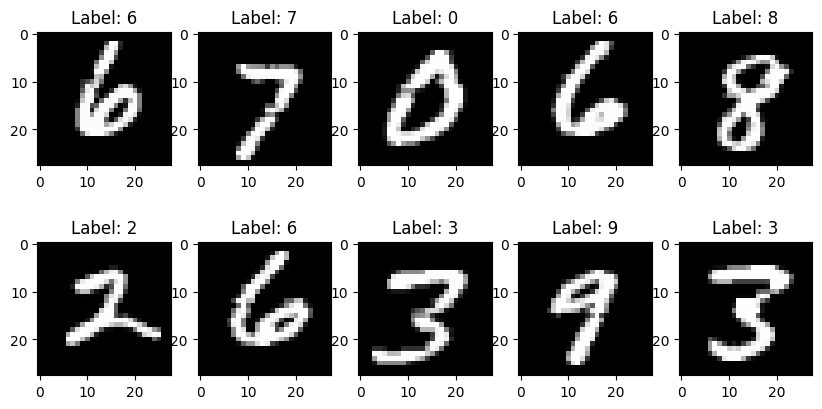

In [18]:
if __name__ == "__main__":
  dManager = DatasetManager("https://github.com/unica-isde/isde/raw/master/data/mnist_data.csv")
  x, y = dManager.loadDataset(1000) #x=images, y=labels. x and y are ndarray

  print(x.shape) #rows * columns = 1000*784
  #print(type(data))
  print(y.shape)
  dManager.digitsForEachClass()
  plotImagesInRows(x,y,2,5)

  dManager.dataSplit()